21.03.24 ML_DL wine 등급 감별(다중분류) 예제

# wine 등급 감별(다중분류)

In [8]:
import numpy as np
import pandas as pd # read_csv, # get_dummies : 원핫인코딩
import tensorflow.keras.utils as utils  # 원핫인코딩
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_y = redwine.iloc[:,-1]
print(redwine_y.unique())
redwine_y = pd.get_dummies(redwine_y).to_numpy()
redwine_y

[5 6 7 4 8 3]


array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [10]:
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_y = redwine.iloc[:,-1]
print(redwine_y.unique())
redwine_y = utils.to_categorical(redwine_y)
redwine_y[:5]

[5 6 7 4 8 3]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

종속변수가 될 와인 등급 : [5 6 7 4 8 3]
Epoch 1/500
5/5 [==============================] - 1s 63ms/step - loss: 1.8649 - accuracy: 0.1544 - val_loss: 1.7448 - val_accuracy: 0.2455
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 1.7162 - accuracy: 0.2620 - val_loss: 1.5980 - val_accuracy: 0.4286
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 1.5686 - accuracy: 0.4244 - val_loss: 1.4674 - val_accuracy: 0.4866
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 1.4288 - accuracy: 0.4722 - val_loss: 1.3602 - val_accuracy: 0.5223
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 1.3441 - accuracy: 0.4866 - val_loss: 1.2768 - val_accuracy: 0.5670
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 1.2560 - accuracy: 0.5213 - val_loss: 1.2136 - val_accuracy: 0.5938
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 1.1748 - accuracy: 0.5592 - val_loss: 1.1700 - val_accuracy: 

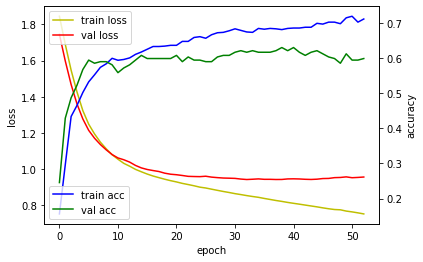

In [11]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy() # 6개 분류로 나눠짐
redwine_y = redwine.iloc[:,-1]
print('종속변수가 될 와인 등급 :',redwine_y.unique()) # 결과가 5 6 7 4 8 3 등급

# scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(redwine_x)
redwine_x = scaler.transform(redwine_x)

# 데이터 셋 전처리(라벨링) ; 원 핫 인코딩 후 numpy형으로 변환
redwine_y = pd.get_dummies(redwine_y).to_numpy() # 3등급의 경우 [1 0 0 0 0 0]
# redwine_y = utils.to_categorical(redwine_y) # 3등급의 경우 [0 0 0 1 0 0 0 0 0]

# 훈련셋과 테스트셋 분리
train_X, test_X, train_Y, test_Y = \
    train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11))
model.add(Dense(50, activation='relu'))
# model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(6, activation='softmax')) # 3,4,5,6,7,8 등급 분류

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', 
#                metrics=[metrics.Recall()])
# model.compile(optimizer='adam', loss='categorical_crossentropy', 
#                metrics=[metrics.Precision()])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
fit_hist = model.fit(train_X, train_Y, batch_size=200, epochs=500,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# 5. 모델 학습 과정 표시하기
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train acc')
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [12]:
pred = np.argmax(model.predict(scaler.transform(test_X)), axis=1)+3
real = np.argmax(test_Y, axis=1)+3
ct = pd.crosstab(real, pred)
ct.index.name = "real"
ct.columns.name='predict'
ct

predict,5,6
real,,
3,1,1
4,1,20
5,31,176
6,27,168
7,9,43
8,0,3


In [13]:
# 6. 모델 사용하기
loss_and_acc = model.evaluate(train_X, train_Y, batch_size=32)
print('loss : ', loss_and_acc[0])
print('accuracy : ', loss_and_acc[1])

35/35 [==============================] - 0s 671us/step - loss: 0.7886 - accuracy: 0.7006
loss :  0.7886146903038025
accuracy :  0.7006255388259888


redwine_y = utils.to_categorical(redwine_y) 방법

종속변수가 될 와인 등급 : [5 6 7 4 8 3]
Epoch 1/500
5/5 [==============================] - 1s 56ms/step - loss: 2.1901 - accuracy: 0.2474 - val_loss: 2.0383 - val_accuracy: 0.3214
Epoch 2/500
5/5 [==============================] - 0s 10ms/step - loss: 2.0021 - accuracy: 0.3779 - val_loss: 1.8757 - val_accuracy: 0.4598
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 1.8425 - accuracy: 0.4688 - val_loss: 1.7203 - val_accuracy: 0.4866
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 1.6769 - accuracy: 0.5131 - val_loss: 1.5820 - val_accuracy: 0.5223
Epoch 5/500
5/5 [==============================] - 0s 11ms/step - loss: 1.5572 - accuracy: 0.5203 - val_loss: 1.4688 - val_accuracy: 0.5670
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 1.4447 - accuracy: 0.5550 - val_loss: 1.3844 - val_accuracy: 0.5670
Epoch 7/500
5/5 [==============================] - 0s 9ms/step - loss: 1.3946 - accuracy: 0.5435 - val_loss: 1.3236 - val_accuracy: 

5/5 [==============================] - 0s 10ms/step - loss: 0.7670 - accuracy: 0.6948 - val_loss: 0.9419 - val_accuracy: 0.6250
Epoch 60/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7755 - accuracy: 0.6982 - val_loss: 0.9418 - val_accuracy: 0.6295
Epoch 61/500
5/5 [==============================] - 0s 10ms/step - loss: 0.7660 - accuracy: 0.7017 - val_loss: 0.9432 - val_accuracy: 0.6205
Epoch 62/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7526 - accuracy: 0.6989 - val_loss: 0.9443 - val_accuracy: 0.6205
Epoch 63/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7818 - accuracy: 0.6938 - val_loss: 0.9453 - val_accuracy: 0.6518
Epoch 64/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7470 - accuracy: 0.6950 - val_loss: 0.9487 - val_accuracy: 0.6161
Epoch 65/500
5/5 [==============================] - 0s 9ms/step - loss: 0.7515 - accuracy: 0.6956 - val_loss: 0.9527 - val_accuracy: 0.6027
Epoch 66/500
5/5 [============

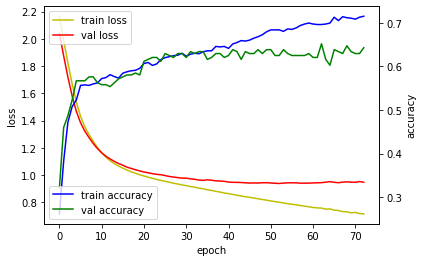

In [14]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy() # 6개 분류로 나눠짐
redwine_y = redwine.iloc[:,-1]
print('종속변수가 될 와인 등급 :',redwine_y.unique()) # 결과가 5 6 7 4 8 3 등급

# scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(redwine_x)
redwine_x = scaler.transform(redwine_x)

# 데이터 셋 전처리(라벨링) ; 원 핫 인코딩 후 numpy형으로 변환
# redwine_y = pd.get_dummies(redwine_y).to_numpy()
redwine_y = utils.to_categorical(redwine_y)

# 훈련셋과 테스트셋 분리
train_X, test_X, train_Y, test_Y = \
    train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11))
model.add(Dense(50, activation='relu'))
# model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(9, activation='softmax')) # 3,4,5,6,7,8 등급 분류

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.Recall()])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.Precision()])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
fit_hist = model.fit(train_X, train_Y, batch_size=200, epochs=500,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# 5. 모델 학습 과정 표시하기
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train accuracy')
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [15]:
pred = np.argmax(model.predict(scaler.transform(test_X)), axis=1)
ct = pd.crosstab(np.argmax(test_Y, axis=1), pred)
ct.index.name="real"
ct.columns.name="predict"
ct

predict,5,6,7
real,,,
3,1,0,1
4,0,1,20
5,7,24,176
6,5,22,168
7,0,7,45
8,0,0,3


In [17]:
# 6. 모델 사용하기
loss_and_acc = model.evaluate(train_X, train_Y, batch_size=32)
print('loss : ', loss_and_acc[0])
print('accuracy : ', loss_and_acc[1])

35/35 [==============================] - 0s 615us/step - loss: 0.7565 - accuracy: 0.7078
loss :  0.7564631700515747
accuracy :  0.707774817943573


scale 값 조정 안하기

종속변수가 될 와인 등급 : [5 6 7 4 8 3]
Epoch 1/500
5/5 [==============================] - 1s 51ms/step - loss: 3.0277 - accuracy: 0.4233 - val_loss: 1.6579 - val_accuracy: 0.4330
Epoch 2/500
5/5 [==============================] - 0s 11ms/step - loss: 1.6412 - accuracy: 0.4587 - val_loss: 1.5988 - val_accuracy: 0.4286
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 1.3534 - accuracy: 0.4889 - val_loss: 1.4707 - val_accuracy: 0.4554
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 1.4568 - accuracy: 0.4667 - val_loss: 1.3459 - val_accuracy: 0.4866
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 1.2409 - accuracy: 0.5064 - val_loss: 1.3898 - val_accuracy: 0.4464
Epoch 6/500
5/5 [==============================] - 0s 9ms/step - loss: 1.2853 - accuracy: 0.4626 - val_loss: 1.2569 - val_accuracy: 0.4955
Epoch 7/500
5/5 [==============================] - 0s 10ms/step - loss: 1.2224 - accuracy: 0.4873 - val_loss: 1.2476 - val_accuracy: 

5/5 [==============================] - 0s 11ms/step - loss: 1.0227 - accuracy: 0.5506 - val_loss: 1.0989 - val_accuracy: 0.5223
Epoch 60/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0470 - accuracy: 0.5633 - val_loss: 1.1001 - val_accuracy: 0.5179
Epoch 61/500
5/5 [==============================] - 0s 9ms/step - loss: 1.0188 - accuracy: 0.5501 - val_loss: 1.0944 - val_accuracy: 0.5402
Epoch 62/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0456 - accuracy: 0.5603 - val_loss: 1.1167 - val_accuracy: 0.5089
Epoch 63/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0437 - accuracy: 0.5733 - val_loss: 1.0972 - val_accuracy: 0.5223
Epoch 64/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0223 - accuracy: 0.5506 - val_loss: 1.0894 - val_accuracy: 0.5357
Epoch 65/500
5/5 [==============================] - 0s 10ms/step - loss: 1.0200 - accuracy: 0.5382 - val_loss: 1.0955 - val_accuracy: 0.5089
Epoch 66/500
5/5 [=========

5/5 [==============================] - 0s 9ms/step - loss: 0.9428 - accuracy: 0.5960 - val_loss: 1.0368 - val_accuracy: 0.5893
Epoch 118/500
5/5 [==============================] - 0s 10ms/step - loss: 0.9332 - accuracy: 0.6010 - val_loss: 1.0373 - val_accuracy: 0.5670
Epoch 119/500
5/5 [==============================] - 0s 9ms/step - loss: 0.9306 - accuracy: 0.5814 - val_loss: 1.0751 - val_accuracy: 0.5312
Epoch 120/500
5/5 [==============================] - 0s 10ms/step - loss: 0.9398 - accuracy: 0.5965 - val_loss: 1.0443 - val_accuracy: 0.5893
Epoch 121/500
5/5 [==============================] - 0s 10ms/step - loss: 0.9250 - accuracy: 0.5910 - val_loss: 1.0471 - val_accuracy: 0.5268
Epoch 122/500
5/5 [==============================] - 0s 9ms/step - loss: 0.9138 - accuracy: 0.5987 - val_loss: 1.0706 - val_accuracy: 0.5268
Epoch 123/500
5/5 [==============================] - 0s 9ms/step - loss: 0.9195 - accuracy: 0.5841 - val_loss: 1.0431 - val_accuracy: 0.5893
Epoch 124/500
5/5 [=====

5/5 [==============================] - 0s 9ms/step - loss: 0.8994 - accuracy: 0.6140 - val_loss: 1.0145 - val_accuracy: 0.5804
Epoch 176/500
5/5 [==============================] - 0s 9ms/step - loss: 0.8866 - accuracy: 0.6142 - val_loss: 1.0383 - val_accuracy: 0.5446
Epoch 177/500
5/5 [==============================] - 0s 9ms/step - loss: 0.8720 - accuracy: 0.6271 - val_loss: 1.0184 - val_accuracy: 0.5848
Epoch 178/500
5/5 [==============================] - 0s 9ms/step - loss: 0.8554 - accuracy: 0.6303 - val_loss: 1.0250 - val_accuracy: 0.5580
Epoch 179/500
5/5 [==============================] - 0s 10ms/step - loss: 0.8547 - accuracy: 0.6344 - val_loss: 1.0108 - val_accuracy: 0.5938
Epoch 180/500
5/5 [==============================] - 0s 10ms/step - loss: 0.8620 - accuracy: 0.6499 - val_loss: 1.0110 - val_accuracy: 0.5714
Epoch 181/500
5/5 [==============================] - 0s 10ms/step - loss: 0.8677 - accuracy: 0.6367 - val_loss: 1.0106 - val_accuracy: 0.5938
Epoch 182/500
5/5 [=====

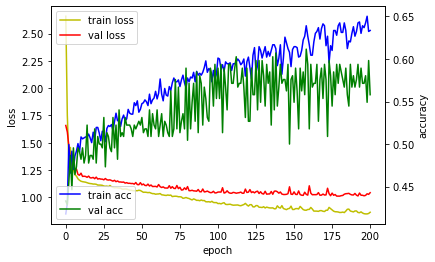

In [18]:
# 1. 데이터 셋 준비하기
redwine = pd.read_csv('data/winequality-red.csv', sep=';')
redwine_x = redwine.iloc[:,:-1].to_numpy()
redwine_y = redwine.iloc[:,-1]
print('종속변수가 될 와인 등급 :',redwine_y.unique())
# 데이터 셋 전처리(라벨링) ; 원 핫 인코딩 후 numpy형으로 변환
redwine_y = pd.get_dummies(redwine_y).to_numpy()

# 훈련셋과 테스트셋 분리
train_X, test_X, train_Y, test_Y = \
    train_test_split(redwine_x, redwine_y, test_size=0.3, random_state=1)

# 2. 모델 구성하기
model = Sequential()
model.add(Input(11))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(6, activation='softmax')) # 3,4,5,6,7,8 등급 분류

# 3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20)
fit_hist = model.fit(train_X, train_Y, batch_size=200, epochs=500,
                    validation_split=0.2,
                    callbacks=[early_stopping])
# 5. 모델 학습 과정 표시하기
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train acc')
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [19]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
import numpy as np
# 각 클래스별 확률을 출력하므로 argmax를 이용해서 가장 큰 인덱스를 값으로
pred = np.argmax(model.predict(test_X), axis=1)
ct = pd.crosstab(np.argmax(test_Y, axis=1)+3, pred+3)
ct.index.name = 'real'
ct.columns.name = 'predict'
ct

predict,5,6,7
real,,,
3,2,0,0
4,14,6,1
5,130,71,6
6,45,129,21
7,4,24,24
8,0,1,2


In [21]:
# 6. 모델 사용하기
loss_and_acc = model.evaluate(train_X, train_Y, batch_size=32)
print('loss : ', loss_and_acc[0])
print('accuracy : ', loss_and_acc[1])

35/35 [==============================] - 0s 704us/step - loss: 0.8997 - accuracy: 0.6256
loss :  0.8997156023979187
accuracy :  0.6255585551261902
